### Introduction to week 4 workbook: Combining internal and external measures

In this workbook we will explore some data from the UM Women's Field Hockey team.  We have data from several different dates in the data file -- but we'll focus on one particular date for this analysis. 

Last week we looked at data from a Catapult Sports device that provided us 10 Hz (10 collections per second) for heart rate and player load across most of the roster of the women's basketball team -- for the duration of several games.  This dataset is similar in that it provides both heart rate and player load.  However, it also have other values such as acceleration, odometer (distance), velocity and latitude and longitude markers (since field hockey is an outdoor sport with the capability of using the GPS measures!)

So -- let's jump in to this dataset and see what we can see.


### Import Libraries and Dataset 

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
import matplotlib.dates as mdates
import datetime
import plotly.graph_objects as go
#from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv("../Data/FH.csv", index_col =["Timestamp"], parse_dates=["Timestamp"])
df.shape

(5224154, 10)

Consistent with our last 10 Hz Catapult dataset -- it is very useful to have the Timestamp used as the index for the dataframe. 

Let's take a look at all the dates in our dataset next: 

In [2]:
df.index.map(pd.Timestamp.date).unique()   # this is not really necessary to run -- just provides details about the dates of the datasets

Index([2018-09-30, 2018-10-28, 2018-08-19, 2018-08-25, 2018-10-12, 2018-08-26,
       2018-10-05, 2018-08-20],
      dtype='object', name='Timestamp')

Not all of these dates are full team games -- but this big dataset gives you some additional data to analyze beyond what we will use for this course.


Let's check out the columns -- they should look relatively familiar to our workbook from last week: 

When we made the Timestamp our index -- we ended up with an "unnamed" column - which we can now "drop".

In [3]:
df.drop(['Unnamed: 0'], axis=1, inplace=True) # we can drop the previous index column ('unnamed')
df.shape

(5224154, 9)

This has 5 million timepoints -- so let's see what kind of heart rate data we have across all of this Catapult data.  Note: there are definitely athletes that don't like to where a heart rate monitor - so that can have a huge impact on how much data is collected.  The catapult communicates with the polar heart rate strap -- but the athlete needs to be wearing the heart rate strap in order to have data!

In [4]:
(df== 0).sum(axis=0) 

Seconds              67
Velocity        2630150
Acceleration     620441
Odometer          12787
Latitude           5810
Longitude          5810
Heart Rate      1810499
Player Load        3820
AthleteID             0
dtype: int64

So across 5 million timepoints - there are about 1.8 million zero values for heart rate!  Let's get to a specific date and see what we find: 

In [5]:
Game_09_30_df = df.loc['2018-09-30']
Game_09_30_df.shape

(1628913, 9)

In [6]:
(Game_09_30_df == 0).sum(axis=0)  # we are just capturing the number of cells with a zero in them for each column in the dataframe_df == 0).sum(axis=0)  # we are just capturing the number of cells with a zero in them for each column in the dataframe

Seconds             21
Velocity        853377
Acceleration    347467
Odometer          3885
Latitude          2029
Longitude         2029
Heart Rate      609658
Player Load        292
AthleteID            0
dtype: int64

This is a real dataset -- and it has its share of limitations.  The biggest issue is that there is a lot of missing HR data (apparently). From this result we see that there are nearly 610k zeroes in the "heart rate" column which is about 1600k in total (or 1.6 million).  However, we can still use this real data to evaluate the idea of combining internal and external measures.  So... let's take a closer look at the dataset: 

In [7]:
# The following will look at each athelete and, for each of our columns of seconds, heart rate, and player load
# we will generate the min, average, and max values
Game_09_30_df.groupby('AthleteID').agg([min,np.average,max,len])

Seconds                                Velocity                  \
               min      average      max      len      min   average   max   
AthleteID                                                                    
Athlete 1      0.0  4091.803463  7987.94  76513.0      0.0  0.562290  6.32   
Athlete 10     0.0  3870.817178  7987.99  76065.0      0.0  0.321415  6.05   
Athlete 11     0.0  4028.612653  7987.93  78288.0      0.0  0.443839  6.52   
Athlete 12     0.0  3990.413839  7987.97  78145.0      0.0  1.007716  6.82   
Athlete 13     0.0  4032.662835  7987.94  78245.0      0.0  0.740601  6.33   
Athlete 14     0.0  3912.858305  7855.38  77635.0      0.0  0.984435  6.34   
Athlete 15     0.0  4017.623065  7987.94  78341.0      0.0  0.430113  6.61   
Athlete 17     0.0  4136.407402  7987.95  74519.0      0.0  0.910862  6.76   
Athlete 18     0.0  4072.898869  7987.95  77118.0      0.0  0.745441  6.63   
Athlete 19     0.0  3956.457056  7987.99  77301.0      0.0  0.503114  6.82   
Athlete 2      0.0  4003.603485  7987.93  78746.0      0.0  0.203151  4.69   
Athlete 20     0.0  3952.859118  7987.98  76173.0      0.0  0.915996  6.90   
Athlete 21     0.0  4060.964388  7987.94  76859.0      0.0  0.731161  6.31   
Athlete 23     0.0  3926.365852  7987.98  75635.0      0.0  0.959475  6.22   
Athlete 24     0.0  3987.532494  7988.03  79023.0      0.0  0.615692  7.16   
Athlete 3      0.0  3987.789568  7987.94  78818.0      0.0  0.220433  5.21   
Athlete 4      0.0  3937.508204  7987.99  77025.0      0.0  0.820689  6.93   
Athlete 5      0.0  3977.751940  7988.02  78571.0      0.0  0.539869  6.29   
Athlete 6      0.0  3984.833097  7987.97  79269.0      0.0  1.180571  7.15   
Athlete 7      0.0  4017.276120  7987.93  78584.0      0.0  1.102434  6.77   
Athlete 9      0.0  4033.485165  7987.95  78040.0      0.0  0.901318  6.73   

                    Acceleration            ...  Longitude           \
                len          min   average  ...        max      len   
AthleteID                                   ...                       
Athlete 1   76513.0    -3.901531  0.000520  ... -83.740586  76513.0   
Athlete 10  76065.0    -3.456285 -0.000308  ...   0.000000  76065.0   
Athlete 11  78288.0    -3.517356  0.000113  ... -83.740614  78288.0   
Athlete 12  78145.0    -4.362817 -0.000043  ...   0.000000  78145.0   
Athlete 13  78245.0    -3.651520  0.000203  ... -83.740035  78245.0   
Athlete 14  77635.0    -3.911578 -0.000188  ... -83.740600  77635.0   
Athlete 15  78341.0    -4.255223 -0.000140  ... -83.740492  78341.0   
Athlete 17  74519.0    -4.742297  0.000180  ...   0.000000  74519.0   
Athlete 18  77118.0    -3.406004  0.000417  ... -83.740633  77118.0   
Athlete 19  77301.0    -3.295199  0.000691  ...   0.000000  77301.0   
Athlete 2   78746.0    -2.748734  0.000037  ... -83.740475  78746.0   
Athlete 20  76173.0    -3.742445 -0.000156  ... -83.740624  76173.0   
Athlete 21  76859.0    -3.406258  0.000721  ...   0.000000  76859.0   
Athlete 23  75635.0    -3.921700 -0.000151  ... -83.740597  75635.0   
Athlete 24  79023.0    -4.580657  0.000542  ...   0.000000  79023.0   
Athlete 3   78818.0    -3.460766 -0.000010  ...   0.000000  78818.0   
Athlete 4   77025.0    -3.942895  0.000038  ... -83.740264  77025.0   
Athlete 5   78571.0    -3.358082  0.000163  ... -83.740626  78571.0   
Athlete 6   79269.0    -5.258664  0.000239  ... -83.740196  79269.0   
Athlete 7   78584.0    -4.948379 -0.000172  ... -83.740634  78584.0   
Athlete 9   78040.0    -3.673820 -0.000206  ... -83.740586  78040.0   

           Heart Rate                         Player Load                     \
                  min     average  max    len         min     average    max   
AthleteID                                                                      
Athlete 1           0   57.912002  141  76513         0.0  221.957845  477.2   
Athlete 10          0   30.390653  184  76065         0.0  130.261340  299.3   
Athlete 11          0   60.459496

We can see from this table that there is only one athlete that doesn't have a minimum heart rate of zero ("Athlete 6" who has a minimum HR of 99).  So, let's drop the heart rate zeroes (as they can't really exist physiologically) -- and we will fill with "Nan" (not a number) so that we can still do calculations where values exist. (Just like last week):

In [8]:
%%capture
Game_09_30_df.loc[Game_09_30_df['Heart Rate'] ==0,'Heart Rate'] = np.nan  # replace all Heart Rate values of zero with "nan"

In [9]:
DataCount = Game_09_30_df.groupby('AthleteID')['Heart Rate','Player Load'].count()

DataCount['Missing HR values']= (DataCount['Player Load']-DataCount['Heart Rate'])
DataCount['% HR missing'] = DataCount['Missing HR values']/DataCount['Player Load']*100

print(DataCount)

            Heart Rate  Player Load  Missing HR values  % HR missing
AthleteID                                                           
Athlete 1        44087        76513              32426     42.379726
Athlete 10       24032        76065              52033     68.405969
Athlete 11       46511        78288              31777     40.589873
Athlete 12       29875        78145              48270     61.769787
Athlete 13       74156        78245               4089      5.225893
Athlete 14       77155        77635                480      0.618278
Athlete 15       72184        78341               6157      7.859231
Athlete 17       21547        74519              52972     71.085227
Athlete 18       76945        77118                173      0.224332
Athlete 19       77043        77301                258      0.333760
Athlete 2            0        78746              78746    100.000000
Athlete 20       36392        76173              39781     52.224542
Athlete 21       22495        7685

Okay - we have a lot of athletes and about 75k timepoints per athlete.  However, we are missing a lot of HR data from some athletes.  Although it is arbitrary to decide how much is too much when it comes to missing data - we are going to use an arbitrary cut-point of 10% as the cap for our analysis.  

So, in the code that follows, we can limit our dataset moving forward to only those athletes that have less than 10% of their HR data missing using a combination of the "is in" and "query" methods.

In [10]:
Game_09_30_df=Game_09_30_df[Game_09_30_df['AthleteID'].isin(DataCount.query("`% HR missing` < 10").index)]
Game_09_30_df.shape

(625750, 9)

In [11]:
Game_09_30_df.groupby('AthleteID').agg([min,np.average,max,len])

Seconds                                Velocity                  \
               min      average      max      len      min   average   max   
AthleteID                                                                    
Athlete 13     0.0  4032.662835  7987.94  78245.0      0.0  0.740601  6.33   
Athlete 14     0.0  3912.858305  7855.38  77635.0      0.0  0.984435  6.34   
Athlete 15     0.0  4017.623065  7987.94  78341.0      0.0  0.430113  6.61   
Athlete 18     0.0  4072.898869  7987.95  77118.0      0.0  0.745441  6.63   
Athlete 19     0.0  3956.457056  7987.99  77301.0      0.0  0.503114  6.82   
Athlete 24     0.0  3987.532494  7988.03  79023.0      0.0  0.615692  7.16   
Athlete 3      0.0  3987.789568  7987.94  78818.0      0.0  0.220433  5.21   
Athlete 6      0.0  3984.833097  7987.97  79269.0      0.0  1.180571  7.15   

                    Acceleration            ...  Longitude           \
                len          min   average  ...        max      len   
AthleteID                                   ...                       
Athlete 13  78245.0    -3.651520  0.000203  ... -83.740035  78245.0   
Athlete 14  77635.0    -3.911578 -0.000188  ... -83.740600  77635.0   
Athlete 15  78341.0    -4.255223 -0.000140  ... -83.740492  78341.0   
Athlete 18  77118.0    -3.406004  0.000417  ... -83.740633  77118.0   
Athlete 19  77301.0    -3.295199  0.000691  ...   0.000000  77301.0   
Athlete 24  79023.0    -4.580657  0.000542  ...   0.000000  79023.0   
Athlete 3   78818.0    -3.460766 -0.000010  ...   0.000000  78818.0   
Athlete 6   79269.0    -5.258664  0.000239  ... -83.740196  79269.0   

           Heart Rate                             Player Load              \
                  min     average    max      len         min     average   
AthleteID                                                                   
Athlete 13       82.0         NaN  216.0  78245.0         0.0  286.754861   
Athlete 14       83.0         NaN  225.0  77635.0         0.0  377.869487   
Athlete 15       69.0         NaN  208.0  78341.0         0.0  235.360662   
Athlete 18       70.0         NaN  199.0  77118.0         0.0  366.222677   
Athlete 19       63.0         NaN  217.0  77301.0         0.0  218.246474   
Athlete 24       72.0         NaN  225.0  79023.0         0.0  273.089471   
Athlete 3        61.0         NaN  210.0  78818.0         0.0  196.832966   
Athlete 6        99.0  165.471559  211.0  79269.0         0.0  478.321266   

                            
              max      len  
AthleteID                   
Athlete 13  609.2  78245.0  
Athlete 14  751.7  77635.0  
Athlete 15  478.6  78341.0  
Athlete 18  688.5  77118.0  
Athlete 19  456.6  77301.0  
Athlete 24  592.4  79023.0  
Athlete 3   263.0  78818.0  
Athlete 6   980.5  79269.0  

[8 rows x 32 columns]

Now that we have cleaned up the heart rate data - let's see what kind of player load our remaining athletes have.  We can plot them all on a single plot:

AthleteID
Athlete 13    AxesSubplot(0.125,0.125;0.775x0.755)
Athlete 14    AxesSubplot(0.125,0.125;0.775x0.755)
Athlete 15    AxesSubplot(0.125,0.125;0.775x0.755)
Athlete 18    AxesSubplot(0.125,0.125;0.775x0.755)
Athlete 19    AxesSubplot(0.125,0.125;0.775x0.755)
Athlete 24    AxesSubplot(0.125,0.125;0.775x0.755)
Athlete 3     AxesSubplot(0.125,0.125;0.775x0.755)
Athlete 6     AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

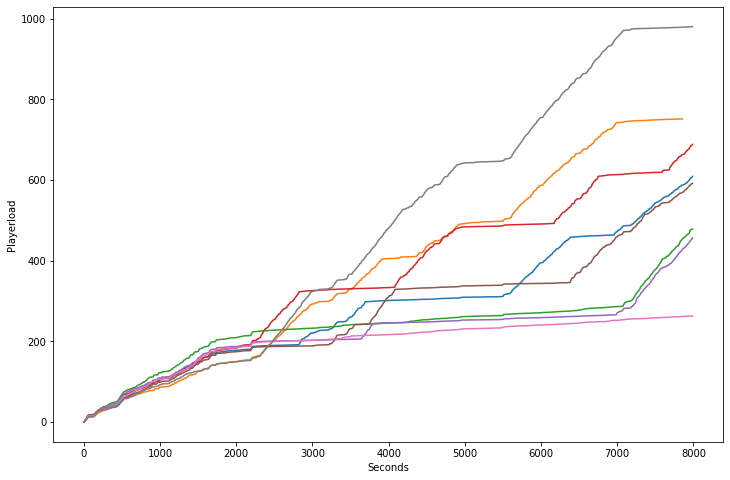

In [12]:
(Game_09_30_df
    .groupby("AthleteID")
    .plot(x="Seconds",y="Player Load", ax=plt.gca(), ylabel="Playerload", figsize=(12,8), legend=False))

This is kind of interesting - in that the team warms up together - so they have a very similar profile during the first 1200 to 1800 seconds (20-30 minutes).  However, once the game starts, we see large differences -- based on whether they are playing in the game or not (presumably).  At least one player appears to have not had any play time. (Pink line)

AthleteID
Athlete 13    AxesSubplot(0.125,0.125;0.775x0.755)
Athlete 14    AxesSubplot(0.125,0.125;0.775x0.755)
Athlete 15    AxesSubplot(0.125,0.125;0.775x0.755)
Athlete 18    AxesSubplot(0.125,0.125;0.775x0.755)
Athlete 19    AxesSubplot(0.125,0.125;0.775x0.755)
Athlete 24    AxesSubplot(0.125,0.125;0.775x0.755)
Athlete 3     AxesSubplot(0.125,0.125;0.775x0.755)
Athlete 6     AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

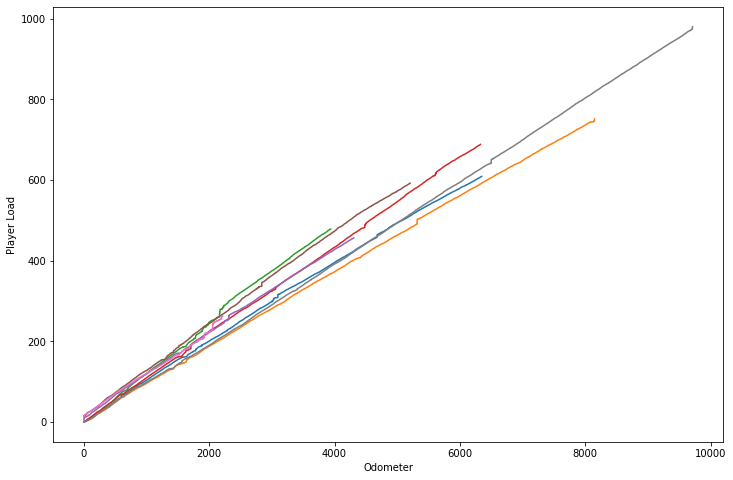

In [13]:
(Game_09_30_df
    .groupby("AthleteID")
    .plot(x="Odometer",y="Player Load", ax=plt.gca(), ylabel="Player Load", figsize=(12,8), legend=False))

This is a nice demonstration of the strong relationship between distance covered (with GPS) and the playerload (via the accelerometers).  This will differ some based on the sport and based on the individual - but we can certainly see a strong linear relationship.  


The relationship will not be nearly as strong between an internal measure (like HR) and an external measure like player load or velocity - but it adds the "personal dimension" (and importantly the relative intensity) of what the athlete is experiencing.  As heart rate changes with time during exertion - we cannot expect a strong correlation between the instant change in accelerometry and the simultaneous heart rate measure.  Rather we need a bit of a time delay.  So, we will add a new column to the dataset to represent the change in player load -- and we'll call it "PL delta" for player load change.

In [14]:
Game_09_30_df['PLdelta'] = Game_09_30_df['Player Load'].diff().fillna(0)

Since it is not possible for an individual to have a negative player load change - we will remove any negative player load changes.  (Negative values can happen in the dataset when running the code above between players).

In [15]:
Game_09_30_df.loc[Game_09_30_df['PLdelta'] <0,'PLdelta'] = np.nan

Now let's see what this PLdelta measure looks like over the course of the game sessions.  

AthleteID
Athlete 13    AxesSubplot(0.125,0.125;0.775x0.755)
Athlete 14    AxesSubplot(0.125,0.125;0.775x0.755)
Athlete 15    AxesSubplot(0.125,0.125;0.775x0.755)
Athlete 18    AxesSubplot(0.125,0.125;0.775x0.755)
Athlete 19    AxesSubplot(0.125,0.125;0.775x0.755)
Athlete 24    AxesSubplot(0.125,0.125;0.775x0.755)
Athlete 3     AxesSubplot(0.125,0.125;0.775x0.755)
Athlete 6     AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

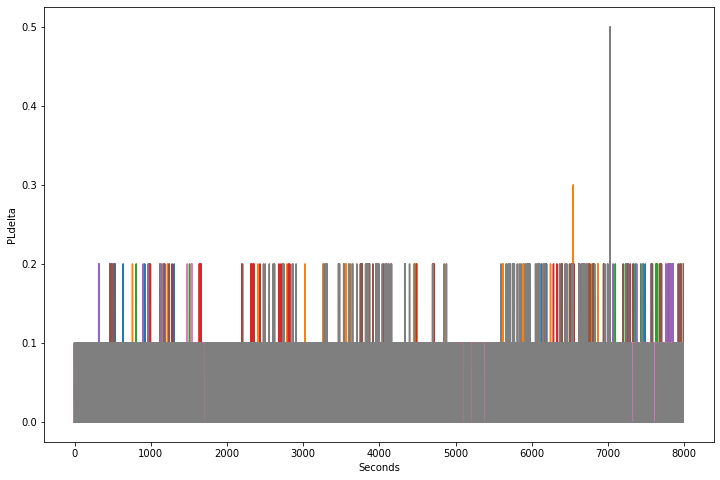

In [16]:
(Game_09_30_df
    .groupby("AthleteID")
    .plot(x="Seconds",y="PLdelta", ax=plt.gca(), ylabel="PLdelta", figsize=(12,8), legend=False))

This is not a "pretty" graph, however, it provides us an important perspective regarding the player load data.  Here we have plotted the data for all the Athletes across all the fractions of a second throughout the entire period collected.  What we can see is that the player load change from a tenth of a second to the next tenth of a second is either 0, 0.1 or occasionally 0.2 playerload (arbitrary) units.  We see one point here for one player that is 0.5 units...but this is very rare.  

So, moving forward with our analysis, we want to capture a window of effort (e.g. between 15 seconds and 2 minutes (120 seconds) to view how the change in playerload over these periods correlates to heart rate.  

We will use the rolling sum to capture these different periods and then run the correlations with heart rate.  We'll set them up to be 15 second increments from 15 seconds to 2 minutes.

In [17]:
Game_09_30_df['PLd_rolling_15sec'] = Game_09_30_df['PLdelta'].rolling(150).sum()
Game_09_30_df['PLd_rolling_30sec'] = Game_09_30_df['PLdelta'].rolling(300).sum()
Game_09_30_df['PLd_rolling_45sec'] = Game_09_30_df['PLdelta'].rolling(450).sum()
Game_09_30_df['PLd_rolling_60sec'] = Game_09_30_df['PLdelta'].rolling(600).sum()
Game_09_30_df['PLd_rolling_75sec'] = Game_09_30_df['PLdelta'].rolling(750).sum()
Game_09_30_df['PLd_rolling_90sec'] = Game_09_30_df['PLdelta'].rolling(900).sum()
Game_09_30_df['PLd_rolling_120sec'] = Game_09_30_df['PLdelta'].rolling(1200).sum()

Game_09_30_df.corr(method='pearson') # this will plot correlations for all columns -- we are interested in HR and these new columns

,Seconds,Velocity,Acceleration,Odometer,Latitude,Longitude,Heart Rate,Player Load,PLdelta,PLd_rolling_15sec,PLd_rolling_30sec,PLd_rolling_45sec,PLd_rolling_60sec,PLd_rolling_75sec,PLd_rolling_90sec,PLd_rolling_120sec
Seconds,1.000000,0.024245,0.000364,0.723608,0.078440,-0.078570,-0.023754,0.772901,-0.004665,-0.013031,-0.011268,-0.009404,-0.007214,-0.005729,-0.005558,-0.007016
Velocity,0.024245,1.000000,0.141878,0.158459,0.026825,-0.027722,0.593607,0.142988,0.422174,0.732927,0.684746,0.652348,0.635828,0.633242,0.628717,0.618905
Acceleration,0.000364,0.141878,1.000000,-0.000883,0.000021,-0.000022,-0.019227,-0.000912,0.071498,-0.091634,-0.056461,-0.042794,-0.033107,-0.026088,-0.023107,-0.018094
Odometer,0.723608,0.158459,-0.000883,1.000000,0.062558,-0.063244,0.270726,0.990986,0.048970,0.138659,0.156907,0.170865,0.183195,0.192985,0.200462,0.212067
Latitude,0.078440,0.026825,0.000021,0.062558,1.000000,-0.999376,-0.020960,0.066922,-0.025257,-0.066534,-0.057512,-0.045052,-0.030345,-0.036872,-0.037569,-0.038634
Longitude,-0.078570,-0.027722,-0.000022,-0.063244,-0.999376,1.000000,0.019544,-0.067584,0.024880,0.065252,0.055683,0.042477,0.026349,-0.038126,-0.038734,-0.039675
Heart Rate,-0.023754,0.593607,-0.019227,0.270726,-0.020960,0.019544,1.000000,0.241401,0.245515,0.715252,0.786663,0.822105,0.839630,0.846807,0.849410,0.850569
Player Load,0.772901,0.142988,-0.000912,0.990986,0.066922,-0.067584,0.241401,1.000000,0.044043,0.125225,0.142504,0.155763,0.167527,0.176880,0.183945,0.194765
PLdelta,-0.004665,0.422174,0.071498,0.048970,-0.025257,0.024880,0.245515,0.044043,1.000000,0.326872,0.296947,0.277786,0.268359,0.266409,0.264015,0.259300
PLd_rolling_15sec,-0.013031,0.732927,-0.091634,0.138659,-0.066534,0.065252,0.715252,0.125225,0.326872,1.000000,0.918033,0.855225,0.810016,0.787443,0.775790,0.753163


We are interested in the correlation between the heart rate column and these new rolling sum values for player load change.  We can see that the correlation gets stronger as we move from a shorter to a longer window of rolling player load changes.  However it is worth noting that the difference between 60 and 120 seconds is a correlation R-value of 0.84 versus 0.85.  Therefore, there does not appear to be a large difference despite the (nominally) increasing values between 60 and 120 seconds duration on the rolling window for player load change. 

We could also calculate individual correlations pretty easily with this strategy:

In [18]:
column_1 = Game_09_30_df['PLd_rolling_60sec']
column_2 = Game_09_30_df['Heart Rate']
correlation = column_1.corr(column_2)
print(correlation)

0.8396297768353883


Now let's get a look at the individual correlations between the 90 second rolling window player load change and the heart rate.  This figure allows us to see the relationship between these variable and also visualize the velocity that the athlete has based on the color.  (Alternatively, you can look at total player load or seconds to see how the end of the game compares to early in the game.)

AthleteID
Athlete 13    AxesSubplot(0.125,0.125;0.62x0.755)
Athlete 14    AxesSubplot(0.125,0.125;0.62x0.755)
Athlete 15    AxesSubplot(0.125,0.125;0.62x0.755)
Athlete 18    AxesSubplot(0.125,0.125;0.62x0.755)
Athlete 19    AxesSubplot(0.125,0.125;0.62x0.755)
Athlete 24    AxesSubplot(0.125,0.125;0.62x0.755)
Athlete 3     AxesSubplot(0.125,0.125;0.62x0.755)
Athlete 6     AxesSubplot(0.125,0.125;0.62x0.755)
dtype: object

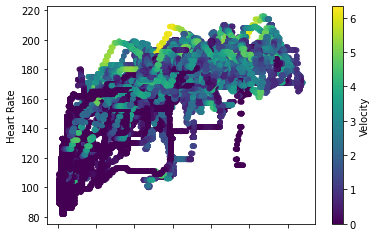

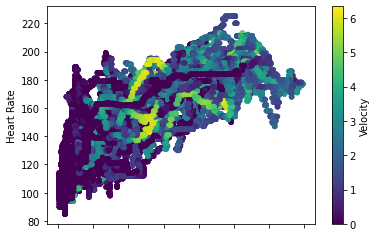

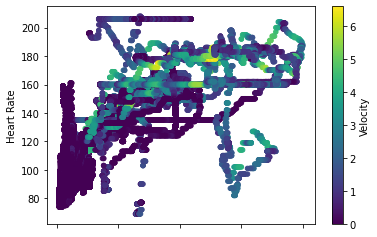

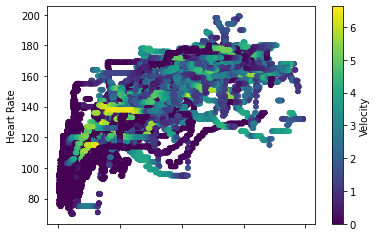

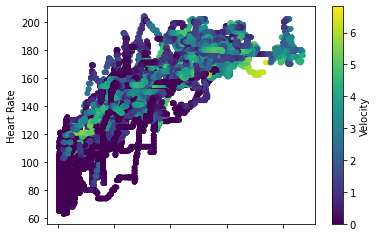

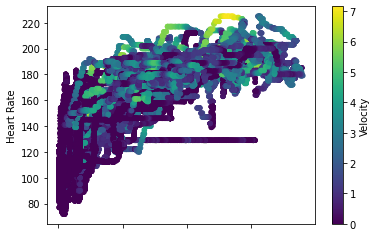

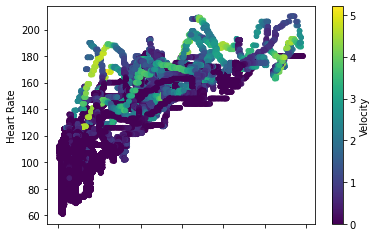

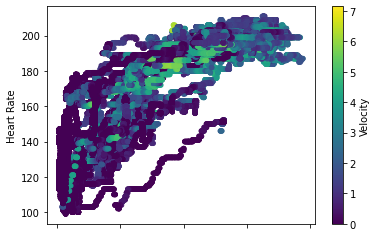

In [19]:
Game_09_30_df.groupby('AthleteID').plot.scatter(x='PLd_rolling_60sec', y='Heart Rate', c="Velocity", colormap='viridis')

For calculating slope and intercept for an simple linear regression, it is sometimes necessary to make sure there are no missing points.  We'll take two steps to check on this: 1) drop any "NA's" from the dataframe; and 2) double checking that there are no "null" values.

In [20]:
Game_09_30_df.dropna(inplace=True)

In [21]:
Game_09_30_df.isnull().values.any()

False

The "false" response above confirms that there are no null values in the dataframe.  We can now calculate the slope and intercept for the different athletes featured in our current dataset.  We'll first calculate the slope and intercept with the entire dataset (all athletes).  This uses the scipy.stats method for determining linear regression.

LinregressResult(slope=6.335618335884682, intercept=105.47302760844343, rvalue=0.8427705734665183, pvalue=0.0, stderr=0.005200600013494509)


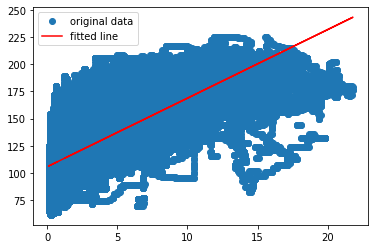

In [22]:
x = np.array(Game_09_30_df['PLd_rolling_60sec'])
y = np.array(Game_09_30_df['Heart Rate'])

res = stats.linregress(x, y)

print(res)
plt.plot(x, y, 'o', label='original data')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

In [23]:
Ath13_Game_09_30_df=Game_09_30_df.loc[Game_09_30_df['AthleteID'] == 'Athlete 13']
Ath14_Game_09_30_df=Game_09_30_df.loc[Game_09_30_df['AthleteID'] == 'Athlete 14']
Ath15_Game_09_30_df=Game_09_30_df.loc[Game_09_30_df['AthleteID'] == 'Athlete 15']
Ath18_Game_09_30_df=Game_09_30_df.loc[Game_09_30_df['AthleteID'] == 'Athlete 18']
Ath19_Game_09_30_df=Game_09_30_df.loc[Game_09_30_df['AthleteID'] == 'Athlete 19']
Ath24_Game_09_30_df=Game_09_30_df.loc[Game_09_30_df['AthleteID'] == 'Athlete 24']
Ath3_Game_09_30_df=Game_09_30_df.loc[Game_09_30_df['AthleteID'] == 'Athlete 3']
Ath6_Game_09_30_df=Game_09_30_df.loc[Game_09_30_df['AthleteID'] == 'Athlete 6']

Athlete 13 LinregressResult(slope=6.871039982047934, intercept=112.82544141545989, rvalue=0.8752582887455763, pvalue=0.0, stderr=0.013942971760666997)


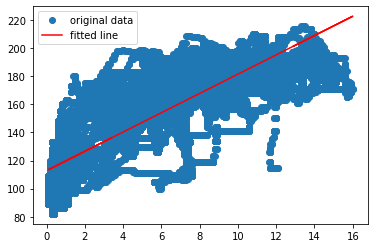

            0
0  Athlete 13
1     6.87104
2  112.825441


In [24]:
x = np.array(Ath13_Game_09_30_df['PLd_rolling_60sec'])
y = np.array(Ath13_Game_09_30_df['Heart Rate'])

res = stats.linregress(x, y)

print("Athlete 13", res)
plt.plot(x, y, 'o', label='original data')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

slopes13 = pd.DataFrame(['Athlete 13', res.slope, res.intercept])
print(slopes13)

Athlete 14 LinregressResult(slope=5.607471554813829, intercept=117.86691459320622, rvalue=0.8520587198389706, pvalue=0.0, stderr=0.012496175225582096)


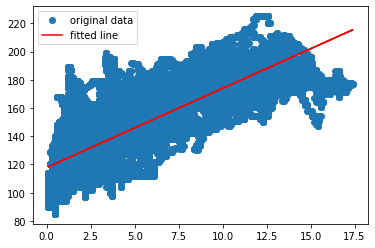

            0
0  Athlete 14
1    5.607472
2  117.866915


In [25]:
x = np.array(Ath14_Game_09_30_df['PLd_rolling_60sec'])
y = np.array(Ath14_Game_09_30_df['Heart Rate'])

res = stats.linregress(x, y)

print("Athlete 14", res)
plt.plot(x, y, 'o', label='original data')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

slopes14 = pd.DataFrame(['Athlete 14', res.slope, res.intercept])
print(slopes14)

Athlete 15 LinregressResult(slope=5.705632567278954, intercept=98.2819148828808, rvalue=0.8056213859685888, pvalue=0.0, stderr=0.01569256101656557)


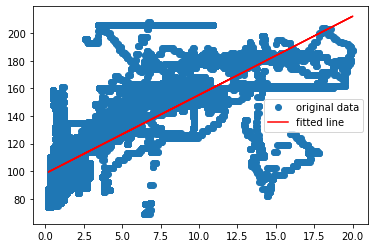

            0
0  Athlete 15
1    5.705633
2   98.281915


In [26]:
x = np.array(Ath15_Game_09_30_df['PLd_rolling_60sec'])
y = np.array(Ath15_Game_09_30_df['Heart Rate'])

res = stats.linregress(x, y)

print("Athlete 15", res)
plt.plot(x, y, 'o', label='original data')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

slopes15 = pd.DataFrame(['Athlete 15', res.slope, res.intercept])
print(slopes15)

Athlete 18 LinregressResult(slope=5.217280359018283, intercept=99.36850725416566, rvalue=0.8817292096708532, pvalue=0.0, stderr=0.010142197751787997)


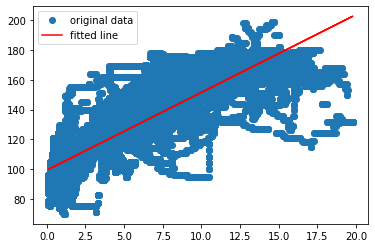

In [27]:
x = np.array(Ath18_Game_09_30_df['PLd_rolling_60sec'])
y = np.array(Ath18_Game_09_30_df['Heart Rate'])

res = stats.linregress(x, y)

print("Athlete 18", res)
plt.plot(x, y, 'o', label='original data')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

slopes18 = pd.DataFrame(['Athlete 18', res.slope, res.intercept])

Athlete 19 LinregressResult(slope=6.432701375985315, intercept=91.59632631955691, rvalue=0.8937589651025726, pvalue=0.0, stderr=0.011722053094386033)


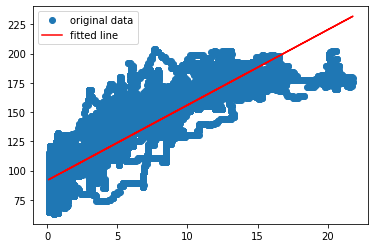

In [28]:
x = np.array(Ath19_Game_09_30_df['PLd_rolling_60sec'])
y = np.array(Ath19_Game_09_30_df['Heart Rate'])

res = stats.linregress(x, y)

print("Athlete 19", res)
plt.plot(x, y, 'o', label='original data')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

slopes19 = pd.DataFrame(['Athlete 19', res.slope, res.intercept])

Athlete 24 LinregressResult(slope=6.145482178002023, intercept=114.45188525955261, rvalue=0.8350911008857542, pvalue=0.0, stderr=0.014624439271500545)


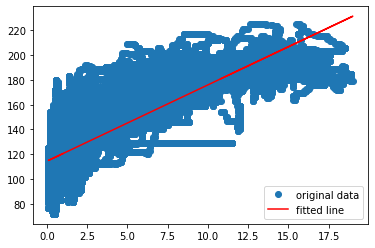

In [29]:
x = np.array(Ath24_Game_09_30_df['PLd_rolling_60sec'])
y = np.array(Ath24_Game_09_30_df['Heart Rate'])

res = stats.linregress(x, y)

print("Athlete 24", res)
plt.plot(x, y, 'o', label='original data')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

slopes24 = pd.DataFrame(['Athlete 24', res.slope, res.intercept])

Athlete 3 LinregressResult(slope=9.222686508856404, intercept=94.7090208837506, rvalue=0.8660427282296645, pvalue=0.0, stderr=0.019128639234782356)


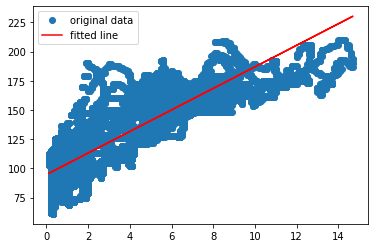

In [30]:
x = np.array(Ath3_Game_09_30_df['PLd_rolling_60sec'])
y = np.array(Ath3_Game_09_30_df['Heart Rate'])

res = stats.linregress(x, y)

print("Athlete 3", res)
plt.plot(x, y, 'o', label='original data')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

slopes3 = pd.DataFrame(['Athlete 3', res.slope, res.intercept])

Athlete 6 LinregressResult(slope=4.8931989799022295, intercept=129.6596797493848, rvalue=0.889580349261339, pvalue=0.0, stderr=0.008992486965437895)


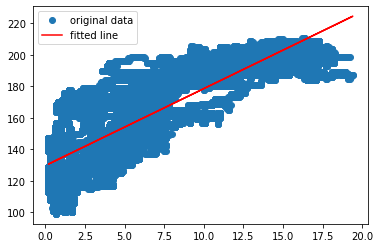

In [31]:
x = np.array(Ath6_Game_09_30_df['PLd_rolling_60sec'])
y = np.array(Ath6_Game_09_30_df['Heart Rate'])

res = stats.linregress(x, y)

print("Athlete 6", res)
plt.plot(x, y, 'o', label='original data')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

slopes6 = pd.DataFrame(['Athlete 6', res.slope, res.intercept])

In [32]:
slope_df=pd.concat([slopes13, slopes14, slopes15, slopes18, slopes19, slopes24, slopes3, slopes6], axis=1)
slope_df 

,0,0,0,0,0,0,0,0
0,Athlete 13,Athlete 14,Athlete 15,Athlete 18,Athlete 19,Athlete 24,Athlete 3,Athlete 6
1,6.87104,5.607472,5.705633,5.21728,6.432701,6.145482,9.222687,4.893199
2,112.825441,117.866915,98.281915,99.368507,91.596326,114.451885,94.709021,129.65968


In [33]:
slope_df=slope_df.T
print(slope_df.columns)

RangeIndex(start=0, stop=3, step=1)


In [34]:
slope_df.reset_index()

,index,0,1,2
0,0,Athlete 13,6.87104,112.825441
1,0,Athlete 14,5.607472,117.866915
2,0,Athlete 15,5.705633,98.281915
3,0,Athlete 18,5.21728,99.368507
4,0,Athlete 19,6.432701,91.596326
5,0,Athlete 24,6.145482,114.451885
6,0,Athlete 3,9.222687,94.709021
7,0,Athlete 6,4.893199,129.65968


In [35]:
slope_df.columns= ['Athlete #', 'Slope', 'Intercept']
slope_df

,Athlete #,Slope,Intercept
0,Athlete 13,6.87104,112.825441
0,Athlete 14,5.607472,117.866915
0,Athlete 15,5.705633,98.281915
0,Athlete 18,5.21728,99.368507
0,Athlete 19,6.432701,91.596326
0,Athlete 24,6.145482,114.451885
0,Athlete 3,9.222687,94.709021
0,Athlete 6,4.893199,129.65968


In [36]:
slope_df['BPM150']=(150-slope_df['Intercept'])/slope_df['Slope']
slope_df

,Athlete #,Slope,Intercept,BPM150
0,Athlete 13,6.87104,112.825441,5.410325
0,Athlete 14,5.607472,117.866915,5.730405
0,Athlete 15,5.705633,98.281915,9.064391
0,Athlete 18,5.21728,99.368507,9.704576
0,Athlete 19,6.432701,91.596326,9.079183
0,Athlete 24,6.145482,114.451885,5.784431
0,Athlete 3,9.222687,94.709021,5.995106
0,Athlete 6,4.893199,129.65968,4.156855


In [37]:
slope_df['BPM180']=(180-slope_df['Intercept'])/slope_df['Slope']
slope_df

,Athlete #,Slope,Intercept,BPM150,BPM180
0,Athlete 13,6.87104,112.825441,5.410325,9.776476
0,Athlete 14,5.607472,117.866915,5.730405,11.08041
0,Athlete 15,5.705633,98.281915,9.064391,14.322353
0,Athlete 18,5.21728,99.368507,9.704576,15.454698
0,Athlete 19,6.432701,91.596326,9.079183,13.742854
0,Athlete 24,6.145482,114.451885,5.784431,10.666065
0,Athlete 3,9.222687,94.709021,5.995106,9.247954
0,Athlete 6,4.893199,129.65968,4.156855,10.287814
